First off, an acknowledgement of the usefulness of the Software Carpentry materials, and particularly data, in preparing this session - this course is not, however, affiliated with or endorsed by the Software Carpentry team. Nonetheless, if you would like a more in-depth walkthrough, relevant to this arthritis example, I recommend you explore their resources, particularly the python-novice-inflammation workshop.

# A New Treatment for Arthritis

## Starting out with some data

In this task, we will examine some data representing trials of an arthritis treatment. Our data is in the form of an ASCII file, where each row represents a patient and each column a consecutive day's measurement of inflammation.

# The Scientific Python Trifecta

* **numpy** - handling numbers

* **matplotlib** - plotting

* **scipy** - general scientific methods

**numpy** has flexible routines for loading raw data...

In the same directory as your notebooks, there is a folder with some data, called `data`.

In [2]:
with open('data/inflammation-01.csv', 'r') as f:
    snippet = f.readlines()[:3]
print(*snippet)

0,0,1,3,1,2,4,7,8,3,3,3,10,5,7,4,7,7,12,18,6,13,11,11,7,7,4,6,8,8,4,4,5,7,3,4,2,3,0,0
 0,1,2,1,2,1,3,2,2,6,10,11,5,9,4,4,7,16,8,6,18,4,12,5,12,7,11,5,11,3,3,5,4,4,5,5,1,1,0,1
 0,1,1,3,3,2,6,2,5,9,5,7,4,5,4,15,5,11,9,10,19,14,12,17,7,12,11,7,4,2,10,5,4,2,2,3,2,2,1,1



This construct, a `with` statement, addresses the age-old problem of cleaning up file descriptors. In general, a *with context* expects the object being used to have some open and close routines that will be called at the entrance and exit of the block, respectively. Note that we don't have scoping here - the `snippet` variable exists outside the block, making it easy to load data in a short block and handle it later.

We could use more traditional syntax:

```python
    f = open('foo.csv', 'r')
    ...
    f.close()
```

but this succinct approach has the benefit of containing use within a protected block.

It can be used for much more than just simple files, such as XML builders, sockets or mutexes.

We also note that a new piece of Python syntax has appeared - a star, indicating that an iterable (here, a list) is used to fill up arguments to a function. This is especially useful with print, and is equivalent to:

```python
    print(snippet[0], snippet[1], snippet[2])
```

However, there are places it really shines. In fact, you can also name arguments to a function - in that case you can additionally provide a dict that fills them out (with two stars to indicate the expansion).

Looking at the printed data, you can see we have a large number of columns (equal for each row), data in the range 0-20 and it is comma-separated. Remember, each row represents a patient and each column, the measurement of inflammation on a given day.

# Import the data

In [3]:
import numpy as np
data = np.loadtxt(fname='data/inflammation-01.csv', delimiter=',') # Comma-separated...
print(data)

[[ 0.  0.  1. ...,  3.  0.  0.]
 [ 0.  1.  2. ...,  1.  0.  1.]
 [ 0.  1.  1. ...,  2.  1.  1.]
 ..., 
 [ 0.  1.  1. ...,  1.  1.  1.]
 [ 0.  0.  0. ...,  0.  2.  0.]
 [ 0.  0.  1. ...,  1.  1.  0.]]


While this has kindly been rendered for us as if it were a list of lists, in reality it is something much more useful...

In [4]:
type(data)

numpy.ndarray

This type is `numpy`'s N-dimensional matrix class. More generally, it is an instance of `numpy.array`, the defining class of numpy, if there is such a thing.

This means we get a wide swathe of attributes and methods applicable to matrices, and a whole load of functions inside `numpy` and other libraries that will happily take it as an argument. One particularly useful property is `shape`:

In [5]:
data.shape

(60, 40)

This tells us that there are 60 patients (rows), each with 40 days of inflammation measurements (columns).

We can get an idea of the wide variety of methods available on the `data` object...

In [6]:
", ".join(dir(data))

'T, __abs__, __add__, __and__, __array__, __array_finalize__, __array_interface__, __array_prepare__, __array_priority__, __array_struct__, __array_wrap__, __bool__, __class__, __contains__, __copy__, __deepcopy__, __delattr__, __delitem__, __dir__, __divmod__, __doc__, __eq__, __float__, __floordiv__, __format__, __ge__, __getattribute__, __getitem__, __gt__, __hash__, __iadd__, __iand__, __ifloordiv__, __ilshift__, __imod__, __imul__, __index__, __init__, __int__, __invert__, __ior__, __ipow__, __irshift__, __isub__, __iter__, __itruediv__, __ixor__, __le__, __len__, __lshift__, __lt__, __mod__, __mul__, __ne__, __neg__, __new__, __or__, __pos__, __pow__, __radd__, __rand__, __rdivmod__, __reduce__, __reduce_ex__, __repr__, __rfloordiv__, __rlshift__, __rmod__, __rmul__, __ror__, __rpow__, __rrshift__, __rshift__, __rsub__, __rtruediv__, __rxor__, __setattr__, __setitem__, __setstate__, __sizeof__, __str__, __sub__, __subclasshook__, __truediv__, __xor__, all, any, argmax, argmin, ar

A lot of the magic methods here, those with double underscores on either side, allow Python to treat this object more like a built-in. For instance, the `__neg__` method will get called when we enter `-data`. If we try `data1 < data2`, then `data1.__lt__` will be called with `data2` as an argument, expecting a boolean return. The behaviour when the user writes `data.previously_unknown_attr` is defined by the `__getattr__` method - this need not be an error. In some ways, you can think of this as an expansion of the concept of operator overloading.

The `array` class uses those methods very effectively, to help us write clear and efficient code.

In [7]:
print(data * 2)

[[ 0.  0.  2. ...,  6.  0.  0.]
 [ 0.  2.  4. ...,  2.  0.  2.]
 [ 0.  2.  2. ...,  4.  2.  2.]
 ..., 
 [ 0.  2.  2. ...,  2.  2.  2.]
 [ 0.  0.  0. ...,  0.  4.  0.]
 [ 0.  0.  2. ...,  2.  2.  0.]]


This works because `numpy` has overridden the `__mul__` method.

We can also do our slicing in multiple dimensions... let's get the top-left corner...

In [8]:
data[0:3, 0:2]

array([[ 0.,  0.],
       [ 0.,  1.],
       [ 0.,  1.]])

In [9]:
data[:3,:3]

array([[ 0.,  0.,  1.],
       [ 0.,  1.,  2.],
       [ 0.,  1.,  1.]])

...or more succinctly...

Try grabbing the bottom left corner (3x3)...

In [10]:
data[-3:, :3]

array([[ 0.,  1.,  1.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  1.]])

A few more practical uses of `nparray`:

In [11]:
data.mean(), data.max(), data.min()

(6.1487499999999997, 20.0, 0.0)

In [12]:
data[3].max()  # Max inflammation for 4th patient

17.0

This could also be written `data[3,:]` - colon on its own just signifies all entries in that axis, from first to last

In [13]:
data[:,1].max() # Max infl for 2nd day

1.0

Suppose we want the max for every day...

We could create a new list and write a loop to go through it, but it seems there should be a more transparent, succinct, *Pythonic* approach

In [16]:
data.max(axis=0)

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  19.,
        18.,  17.,  16.,  15.,  14.,  13.,  12.,  11.,  10.,   9.,   8.,
         7.,   6.,   5.,   4.,   3.,   2.,   1.])

As you can see, the second day does indeed have `max` of `1.0`. Notice that it returns an array (this is a superclass of `ndarray`), so we can do...

An aside: this is the first time you have seen a named argument. In an argument list of a function, you can supply a name for arguments:

```python
def some_function(arg1, info=38, axis=None):
   ...
```

To write a function like this, you must provide a default for the argument. You can then call the function only passing a subset of arguments, as you have just seen.

In [17]:
data.max(axis=0).shape

(40,)

This shouldn't be surprising - we take the maximum over all patients for each of 40 days, so we end up with a 40 element array.

Try using the following cell to get the mean inflammation over all patients for each of the first three days...

(you should use slicing and end up with a 3 element array)

In [18]:
print(data.mean(axis=0)[:3])
print(data[:,:3].mean(axis=0))

[ 0.          0.45        1.11666667]
[ 0.          0.45        1.11666667]


# RIGHT
## Enough text.

Programming isn't about writing reams of code, it's about getting stuff done and having fun while doing it. Right? Right. Right. RIGHT.

In any case, when examining data, it's a whole lot more pleasant and efficient to see visualizations, so lets get started with some plotting.

# Plotting
## Like we're Brutus the Younger

First, we use a magic method that works in Jupyter (strictly, in its IPython backend)

In [19]:
# Switch on the joy
% matplotlib inline

Now for inline plotting we can use the `matplotlib` module, the go-to for Python plotting (but not in the Dijkstra sense)...

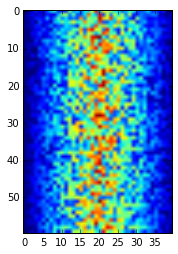

In [20]:
import matplotlib
pretty_pic = matplotlib.pyplot.imshow(data)
matplotlib.pyplot.show(pretty_pic)

MMMM. Pretty. Red shows greater inflammation, and what we may have guessed from the bits of CSV we saw, inflammation starts low, grows and reduces. Patients along the side, days along the bottom.

Time for a challenge... plot the heat map (as above) for the fourth, fifth and sixth patients, transposed with days up the side. The easiest way is to [start with Google](https://www.google.ie/search?q=numpy+ndarray+transpose)... But first, put up your stars so I can see them!

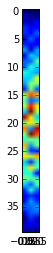

In [21]:
import matplotlib
pretty_pic = matplotlib.pyplot.imshow(data[4:7].T)
matplotlib.pyplot.show(pretty_pic)
#data[4:6]

# Reproducible Plots

If you come from a MATLAB background, or use other plotting tools, you will be used to saving/re-opening a plot...

...in Python you normally have a plotting script that you run each time (and save the image).

## Cons

* You have no standard GUI for designing plots
* If your plot involves lots of processing, it's slow to open

## Pros

* Changes are trivially easy
* Every time you open the plot, it contains current data

## Con-workarounds

* There are libraries for adding GUI elements to plots
* You can split into two scripts
 * output processed data
 * plot

# Example plotting script

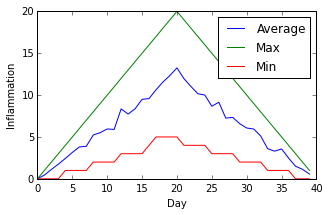

In [22]:
import numpy as np
from matplotlib import pyplot

data = np.loadtxt(fname='data/inflammation-01.csv', delimiter=',')
pyplot.figure(figsize=(5.0, 3.0))

pyplot.xlabel('Day')    
pyplot.ylabel('Inflammation')

pyplot.plot(data.mean(axis=0), label='Average')
pyplot.plot(data.max(axis=0), label='Max')
pyplot.plot(data.min(axis=0), label='Min')
pyplot.legend()

pyplot.show()

In [23]:
exec(In[18])  # Cheeky way to reshow output... forget immediately.

[ 0.          0.45        1.11666667]
[ 0.          0.45        1.11666667]


Now if I want to modify some part... I can do so and have the updated plot straight-away

This particular syntax is for fairly basic use, with only one set of axis and so forth, but it's probably quite familiar if you are coming from MATLAB. If we want to expand a bit more, first we use a more classic matplotlib approach, and neater programming approach, by setting properties directly on specific objects, such as axes...

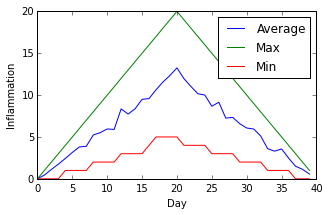

In [24]:
# This is the whole figure, possibly
# with multiple subplots
fig = pyplot.figure(figsize=(5.0, 3.0))

# This is a specific set of axes
axes = fig.add_subplot(1, 1, 1)
axes.set_xlabel('Day')
axes.set_ylabel('Inflammation')

axes.plot(data.mean(axis=0), label='Average')
axes.plot(data.max(axis=0), label='Max')
axes.plot(data.min(axis=0), label='Min')
axes.legend()

pyplot.show()

Not particularly more complicated, but more flexible... say we have a series of plots...

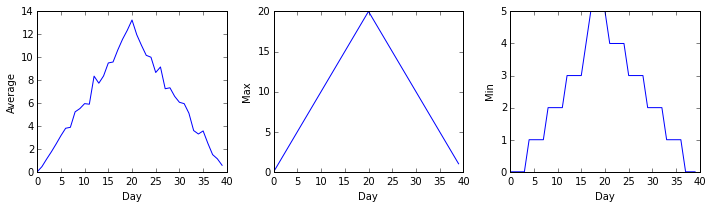

In [25]:
fig = pyplot.figure(figsize=(10.0, 3.0))

axes = []  # Blank list
for i in range(1, 4):
    ax = fig.add_subplot(1, 3, i)
    ax.set_xlabel('Day')
    axes.append(ax)
    
axes[0].set_ylabel('Average')
axes[1].set_ylabel('Max')
axes[2].set_ylabel('Min')

axes[0].plot(data.mean(axis=0))
axes[1].plot(data.max(axis=0))
axes[2].plot(data.min(axis=0))

fig.tight_layout()
pyplot.show(fig)

# Challenge

## Put up your stars!!

Modify the previous cell to give the max line with a dash, the blue line with dots and the red line solid.

Even better, add a title at the top.

When done, swap to the arrow. If you find this very easy and are waiting, leave your arrow up and have a go at plotting all the patients in very light grey behind your three coloured lines. See how long it takes to run for those 63 lines.

If you're having trouble, Google **pyplot line style** and pick the **pylab_examples example code** link...

Bear in mind, and this is particularly the case with matplotlib, that there are multiple similar tools with slightly different configurations and long lists of technical documentation - try not to get lost in them and use Etherpad to flags things up. However, short examples are findable via Google, especially via Stack Overflow, that get you going fast.

# But...
## Not so interactive

If we are using Jupyter, it is probably because we want to have something interactive. Fixed plots in a web-page make it seem like something is missing.

# Bokeh
## Dynamic plots

In [26]:
import bokeh.plotting as bplot
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

If this works, you should see an icon like a rainbow-coloured camera shutter.

In [27]:
fig = bplot.figure()
days = np.arange(data.shape[1])
fig.line(days, data.mean(axis=0))
fig.xaxis.axis_label = "Day"
bplot.show(fig)

Notice the syntax is quite similar to `matplotlib` but a little different, so make sure you don't get them mixed up. For example, `plot` has become specifically `line` and we now explicitly provide the days along the bottom. Note that `numpy.arange` is just like `range` but it returns a `numpy` array.

# Challenge II

## Reproduce our three-line matplotlib plot in Bokeh

In [ ]:
# Here's cell for you...

Don't forget to put up your star!

Start with the [Bokeh documentation](http://bokeh.pydata.org/en/0.10.0/docs/quickstart.html) and the Bokeh example above...

# Summary

* **numpy** lets you manipulate large arrays fast 

* **matplotlib** lets you plot reproducibly

* you can do processing and plotting together or separately

# Answers

In [28]:
# This is the whole figure, possibly
# with multiple subplots
fig = bplot.figure()

days = np.arange(data.shape[1])

# This is a specific set of axes
fig.xaxis.axis_label = 'Day'
fig.yaxis.axis_label = 'Inflammation'

fig.line(days, data.mean(axis=0), legend='Average', color='green')
fig.line(days, data.max(axis=0), legend='Max', color='blue')
fig.line(days, data.min(axis=0), legend='Min', color='red')

bplot.show(fig)